In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
from tensorflow import keras

In [2]:
X_train=np.load('drive/MyDrive/X_train_strat.npy')

In [3]:
y_train=np.load('drive/MyDrive/y_train_strat.npy')

In [4]:
X_val=np.load('drive/MyDrive/X_val_strat.npy')

In [5]:
y_val=np.load('drive/MyDrive/y_val_strat.npy')

##### Load model

In [6]:
test=keras.models.load_model('drive/MyDrive/CNN5Conv78Accuracy')

##### Make Predictions

In [7]:
predict_y=test.predict(X_val)
y_preds=np.argmax(predict_y, axis=1)

In [8]:
# Turn one hot array into integers
y_val_1d=np.argmax(y_val, axis=1)
y_val_1d[2], y_preds[2]

(2, 8)

##### TensorFlow Confusion Matrix

In [9]:
confusion=tf.math.confusion_matrix(labels=y_val_1d, predictions=y_preds)

In [ ]:
print(confusion)

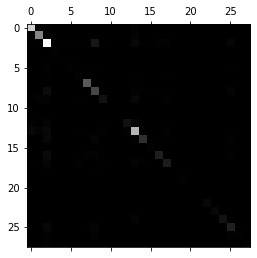

In [10]:
plt.matshow(confusion, cmap=plt.cm.gray)

##### SKLearn Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [57]:
skconf=confusion_matrix(y_val_1d, y_preds)
skconf

array([[1151,   17,   12,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    4,   17,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3,    2,    0,    1],
       [  21,  731,    3,    0,    0,    0,    0,    0,    3,    3,    0,
           0,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    0],
       [  10,    8, 1415,    0,    1,    7,    3,    9,  131,    7,    0,
           0,    3,   48,   10,    0,   13,   18,    0,    5,    0,    1,
           1,    4,    0,   38,    5,    3],
       [   0,    0,    4,   12,    0,    0,    0,    0,    1,    2,    0,
           0,    0,    1,    3,    0,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    7,    0,    0,    0,    3,    0,    0,
           0,    0,    4,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,   18,    0,    

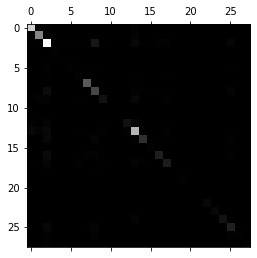

In [23]:
plt.matshow(skconf, cmap=plt.cm.gray)

In [24]:
row_sums=skconf.sum(axis=1, keepdims=True)
mistake_conf=skconf/row_sums

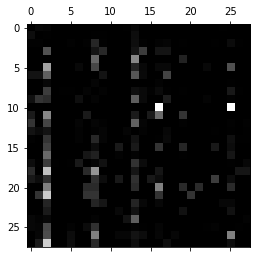

In [56]:
np.fill_diagonal(mistake_conf, 0)
plt.matshow(mistake_conf, cmap=plt.cm.gray)
plt.show()

## 2's are the most common species and many other species get confused for 2's. many images were misclassified as 2's
## there were only 2 10's in the validation set and they were both classified incorrectly, low number of training images for 10's
## many images were also misclassified as 13's, which is the 3rd most common species in validation set
## 0's are second most common and have a high accuracy rate

In [33]:
from collections import Counter
Counter(y_val_1d.tolist())

Counter({0: 1207,
         1: 783,
         2: 1740,
         3: 25,
         4: 15,
         5: 57,
         6: 53,
         7: 512,
         8: 547,
         9: 213,
         10: 2,
         11: 19,
         12: 184,
         13: 1199,
         14: 392,
         15: 40,
         16: 276,
         17: 262,
         18: 24,
         19: 42,
         20: 12,
         21: 10,
         22: 68,
         23: 59,
         24: 141,
         25: 274,
         26: 80,
         27: 37})